##### Example 1: batch matrix multiplication

In [42]:
import torch

In [43]:
batch_size = 10

In [44]:
inp1 = torch.randn(batch_size, 3, 4)

In [45]:
inp2 = torch.randn(batch_size, 4, 5)

Do a batch matrix multiplication 

In [46]:
res = torch.bmm(inp1, inp2)

In [47]:
res.shape

torch.Size([10, 3, 5])

##### Example

In [54]:
b, t, k = 10, 4, 5

In [64]:
x = torch.randn((b, t, k))

In [65]:
x.shape

torch.Size([10, 4, 5])

Swap the second dim (`4` elements) and the last dim (`5` elements) by not using `.permute`

In [66]:
x_new = x.transpose(2, 1)

In [67]:
x_new.shape

torch.Size([10, 5, 4])

##### Example

In [48]:
b, t, k = 10, 4, 5

In [68]:
x = torch.randn((b, t, k))

In [69]:
x.shape

torch.Size([10, 4, 5])

In [70]:
x.transpose(1, 2).shape

torch.Size([10, 5, 4])

In [71]:
raw_weights = torch.bmm(x, x.transpose(1, 2))

##### Example 

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

- `k`: the number of vectors (positional embedding vector) come in?
- `b`
- `t`
- `heads` is the number of attention heads

In [85]:
class SelfAttention(nn.Module):
    def __init__(self, k, heads):
        super().__init__()
        self.k = k
        self.heads = heads
        
        self.to_queries = nn.Linear(k, k * heads, bias=False)        
        self.to_keys = nn.Linear(k, k * heads, bias=False)
        self.to_values = nn.Linear(k, k * heads, bias=False)
        
        # unify all outputs from the difference
        # heads into a single k-vector
        self.unify_heads = nn.Linear(heads * k, k)
    
    def forward(self, x):
        b, t, k = x.size()
        
        queries = self.to_queries(x).view(b, t, h, k)
        keys = self.to_keys(x).view(b, t, h, k)
        values = self.to_values(x).view(b, t, h, k)

In [86]:
self_attention = SelfAttention(k=2, heads=5)

In [87]:
self_attention.to_queries

Linear(in_features=2, out_features=10, bias=False)

##### Example 2

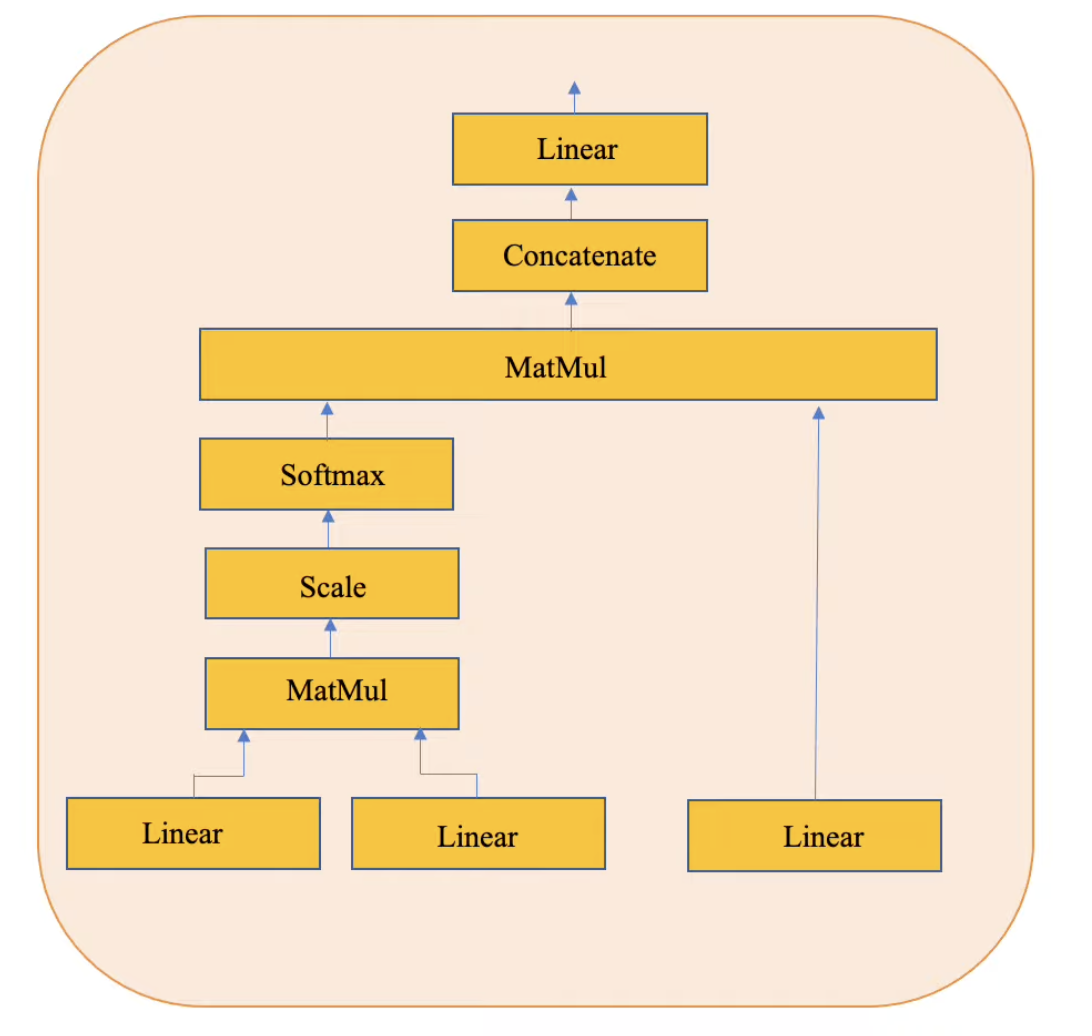

### Cosine Similarity

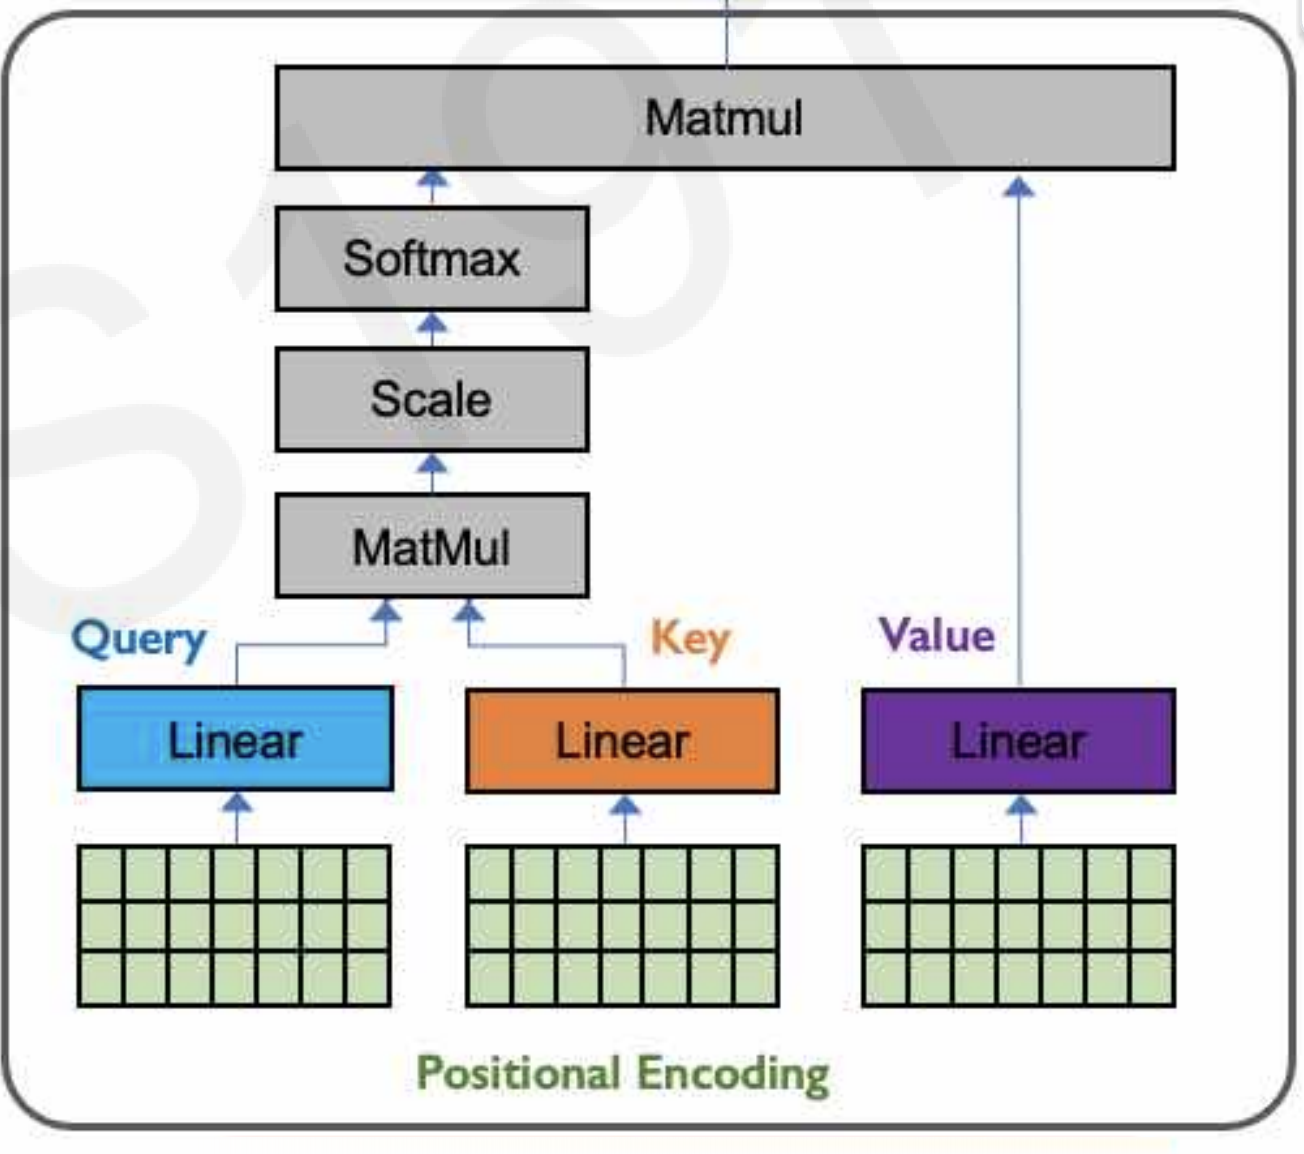

In [1]:
import torch

In [2]:
positional_embedding = torch.randn(3, 7)

In [3]:
positional_embedding

tensor([[-0.1090,  0.2475,  0.5045,  0.3140,  1.7686,  0.6140, -0.3880],
        [ 1.4043,  0.9589,  0.4098, -0.7808, -1.8506, -2.3296, -0.0986],
        [ 2.5057,  1.1200,  0.1491,  0.9988,  0.5886, -0.3630,  0.0945]])

Here is an positional embedding for three words. Each rows correspond to the positional embedding vector of each word

In [ ]:
Linear1 = nn.Linear()